In [1]:
!pip install kaggle


In [2]:
import kagglehub
import pandas as pd
import os

path = kagglehub.dataset_download("mlg-ulb/creditcardfraud")
print("Path to dataset files:", path)

# Load the dataset
csv_path = os.path.join(path, "creditcard.csv")
df = pd.read_csv(csv_path)

print("Dataset shape:", df.shape)
print(df.head())


Using Colab cache for faster access to the 'creditcardfraud' dataset.
Path to dataset files: /kaggle/input/creditcardfraud
Dataset shape: (284807, 31)
   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.00

In [3]:
display(df.head())

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
print("\nColumns:", df.columns.tolist())


Columns: ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class']


In [14]:
fraud = df[df['Class'] == 1]
valid = df[df['Class'] == 0]

fraud_count = len(fraud)
valid_count = len(valid)
total = len(df)

fraud_pct = fraud_count / total * 100
outlierFraction = fraud_count / float(valid_count)

print(f"Outlier Fraction: {outlierFraction:.6f}")
print(f"Fraud Cases: {fraud_count:,}")
print(f"Valid Transactions: {valid_count:,}")
print(f"Fraud cases: {fraud_count:,} ({fraud_pct:.3f}%)")


Outlier Fraction: 0.001730
Fraud Cases: 492
Valid Transactions: 284,315
Fraud cases: 492 (0.173%)


In [12]:
print("Amount details of the fraudulent transaction")
fraud.Amount.describe()

Amount details of the fraudulent transaction


,Amount
count,492.000000
mean,122.211321
std,256.683288
min,0.000000
25%,1.000000
50%,9.250000
75%,105.890000
max,2125.870000


In [15]:
print("details of valid transaction")
valid.Amount.describe()

details of valid transaction


,Amount
count,284315.000000
mean,88.291022
std,250.105092
min,0.000000
25%,5.650000
50%,22.000000
75%,77.050000
max,25691.160000


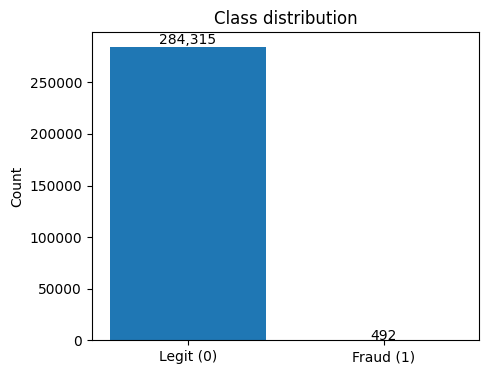

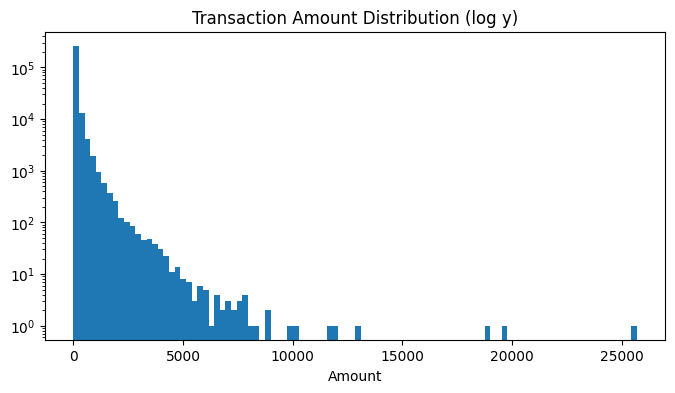

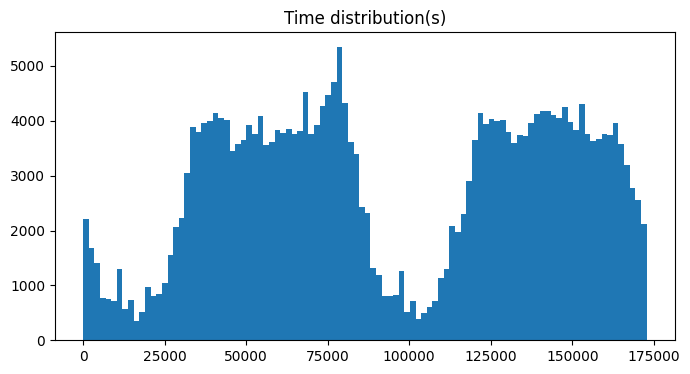

In [24]:
# class distribution, amount distribution, and time distribution
import matplotlib.pyplot as plt

# 1) Class distribution
counts = df['Class'].value_counts().sort_index()
plt.figure(figsize=(5,4))
plt.bar(['Legit (0)','Fraud (1)'], counts.values)
plt.title('Class distribution')
plt.ylabel('Count')
for i, v in enumerate(counts.values):
    plt.text(i, v*1.01, f"{v:,}", ha='center')
plt.show()

# 2) Amount distribution
plt.figure(figsize=(8,4))
plt.hist(df['Amount'], bins=100)
plt.yscale('log')
plt.title('Transaction Amount Distribution (log y)')
plt.xlabel('Amount')
plt.show()

# 3) Time distribution
plt.figure(figsize=(8,4))
plt.hist(df['Time'], bins=100)
plt.title('Time distribution(s)')
plt.show()


,mean,std,min,max
Time,9.481386e+04,47488.145955,0.000000,172792.000000
V1,1.168375e-15,1.958696,-56.407510,2.454930
V2,3.416908e-16,1.651309,-72.715728,22.057729
V3,-1.379537e-15,1.516255,-48.325589,9.382558
V4,2.074095e-15,1.415869,-5.683171,16.875344
V5,9.604066e-16,1.380247,-113.743307,34.801666
V6,1.487313e-15,1.332271,-26.160506,73.301626
V7,-5.556467e-16,1.237094,-43.557242,120.589494
V8,1.213481e-16,1.194353,-73.216718,20.007208
V9,-2.406331e-15,1.098632,-13.434066,15.594995


Top correlations with Class:
Class    1.000000
V11      0.154876
V4       0.133447
V2       0.091289
V21      0.040413
V19      0.034783
V20      0.020090
V8       0.019875
V27      0.017580
V28      0.009536
Name: Class, dtype: float64


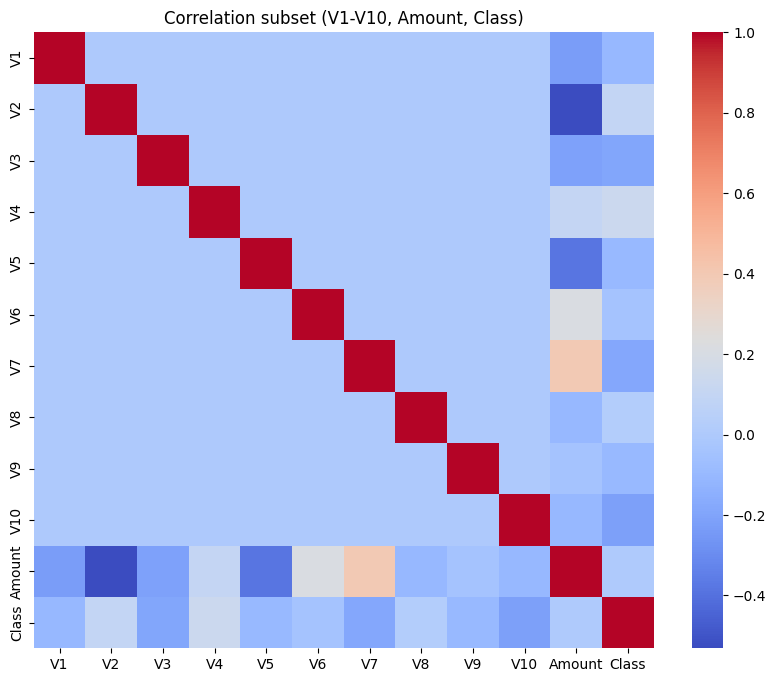

In [18]:
# basic stats & correlation with Class
display(df.describe().T[['mean','std','min','max']])

# Correlation of Amount/Time with Class
corr_with_class = df.corr()['Class'].sort_values(ascending=False)
print("Top correlations with Class:")
print(corr_with_class.head(10))

# Visualize small heatmap of correlation for first 12 features
import seaborn as sns
plt.figure(figsize=(10,8))
cols = ['V1','V2','V3','V4','V5','V6','V7','V8','V9','V10','Amount','Class']
sns.heatmap(df[cols].corr(), annot=False, cmap='coolwarm', fmt=".2f")
plt.title("Correlation subset (V1-V10, Amount, Class)")
plt.show()


In [19]:
# Preprocessing - split and scaling
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df.drop('Class', axis=1)
y = df['Class']

# keep a hold-out test set for final evaluation (stratified)
X_train_raw, X_test_raw, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Scale Amount and Time (V1..V28 are already PCA-normalized)
scaler = StandardScaler()
X_train = X_train_raw.copy()
X_test = X_test_raw.copy()

# scale 'Amount' and 'Time'
X_train[['Amount','Time']] = scaler.fit_transform(X_train[['Amount','Time']])
X_test[['Amount','Time']]  = scaler.transform(X_test[['Amount','Time']])

print("Train shape:", X_train.shape, "Test shape:", X_test.shape)
print("Train class counts:\n", y_train.value_counts())


Train shape: (227845, 30) Test shape: (56962, 30)
Train class counts:
 Class
0    227451
1       394
Name: count, dtype: int64


In [25]:
# SMOTE options
from imblearn.over_sampling import SMOTE

smote_partial = SMOTE(sampling_strategy=0.2, random_state=42)  # minority = 20% of majority
X_train_sm_partial, y_train_sm_partial = smote_partial.fit_resample(X_train, y_train)
print("After partial SMOTE (20%):", y_train_sm_partial.value_counts().to_dict())

After partial SMOTE (20%): {0: 227451, 1: 45490}


In [26]:
# Logistic Regression baseline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score

# Choose which resampled training set to use:
X_train_used, y_train_used = X_train_sm_partial, y_train_sm_partial

log = LogisticRegression(max_iter=2000, class_weight='balanced', random_state=42)

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(log, X_train_used, y_train_used, cv=skf, scoring='accuracy')
print("Logistic Regression accuracy mean:", cv_scores.mean())

# Fit and evaluate on hold-out test set
log.fit(X_train_used, y_train_used)
y_pred = log.predict(X_test)
y_proba = log.predict_proba(X_test)[:,1]

print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_proba))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Logistic Regression accuracy mean: 0.9674398481326815
Test Accuracy: 0.9745093220041431
ROC AUC: 0.9692556820139422
Confusion Matrix:
 [[55420  1444]
 [    8    90]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.97      0.99     56864
           1       0.06      0.92      0.11        98

    accuracy                           0.97     56962
   macro avg       0.53      0.95      0.55     56962
weighted avg       1.00      0.97      0.99     56962



In [27]:
# Random Forest and XGBoost
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Used the same resampled training set above (X_train_used)
rf = RandomForestClassifier(n_estimators=120, max_depth=6, class_weight='balanced', random_state=42)
xgb = XGBClassifier(n_estimators=120, max_depth=5, learning_rate=0.1,
                    subsample=0.8, colsample_bytree=0.8, use_label_encoder=False,
                    eval_metric='logloss', random_state=42)

for name, model in [("RandomForest", rf), ("XGBoost", xgb)]:
    model.fit(X_train_used, y_train_used)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:,1]
    print("="*40)
    print(name)
    print("Test Accuracy:", accuracy_score(y_test, y_pred))
    print("ROC AUC:", roc_auc_score(y_test, y_proba))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))

RandomForest
Test Accuracy: 0.9951546645131842
ROC AUC: 0.976502833829086
Confusion Matrix:
 [[56599   265]
 [   11    87]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.25      0.89      0.39        98

    accuracy                           1.00     56962
   macro avg       0.62      0.94      0.69     56962
weighted avg       1.00      1.00      1.00     56962



/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [16:52:38] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost
Test Accuracy: 0.9984726659878516
ROC AUC: 0.9777042323682428
Confusion Matrix:
 [[56791    73]
 [   14    84]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.54      0.86      0.66        98

    accuracy                           1.00     56962
   macro avg       0.77      0.93      0.83     56962
weighted avg       1.00      1.00      1.00     56962



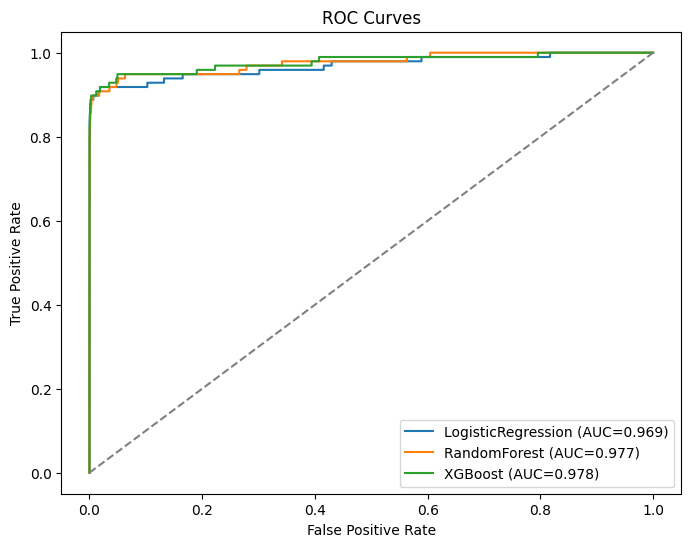

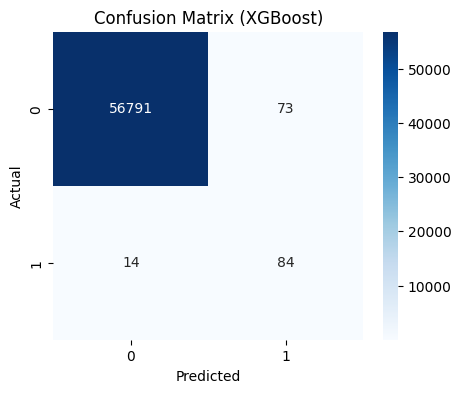

In [ ]:
# ROC curves and nicer confusion matrix plot
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
import seaborn as sns

models = [
    ("LogisticRegression", log),
    ("RandomForest", rf),
    ("XGBoost", xgb)
]

plt.figure(figsize=(8,6))
for name, model in models:
    if hasattr(model, "predict_proba"):
        probs = model.predict_proba(X_test)[:,1]
    else:
        # if model doesn't implement predict_proba
        probs = model.decision_function(X_test)
    fpr, tpr, _ = roc_curve(y_test, probs)
    auc_score = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{name} (AUC={auc_score:.3f})")

plt.plot([0,1],[0,1],"--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves")
plt.legend()
plt.show()

# Confusion matrix for best model
best = xgb
cm = confusion_matrix(y_test, best.predict(X_test))
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()
